In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import torch
import torchvision.transforms as TT
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [31]:
from dataloader import *
from data_augment import *
from learn import *
import cnn
from display import show_keypoints

In [32]:
# Initialite Datasets and Dataloaders

part1_transform = TT.Compose([Rescale(60, 80)])
# Use all 6 images of the first 32 persons (index 1-32) as the training set
# (total 32 x 6 = 192 images)
training_set = NoseKeypointDataset(idxs=np.arange(32), root_dir=ROOT_DIR, transform=part1_transform)
train_loader=DataLoader(training_set,batch_size=16, shuffle=True)

# Use images of the remaining 8 persons (index 33-40) as the validation set
# (total 8 * 6 = 48 images)
validation_set = NoseKeypointDataset(idxs=np.arange(32, 40), root_dir=ROOT_DIR)
test_loader=DataLoader(validation_set,batch_size=1, shuffle=False)

In [42]:
# train
trained_model = train(train_loader, model=cnn.NoseFinder(), learning_rate=1e-3, epochs=10)

  0%|          | 0/12 [00:00<?, ?it/s]===== Epoch 0 =====
0 99527.0234375
  8%|▊         | 1/12 [00:03<00:38,  3.46s/it]


KeyboardInterrupt: 

In [46]:
test(test_loader, trained_model)

  0%|          | 0/48 [00:00<?, ?it/s]torch.Size([1, 1, 2])
torch.Size([1, 58, 2])



AssertionError: (2,)

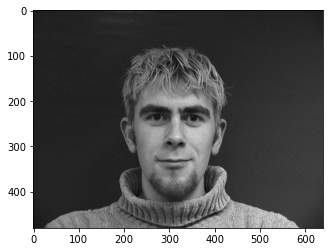

In [17]:
# Plotting a few input images and their nose keypoints.
# show_keypoints(training_set[0][0], training_set[0][1])
from display import to_display_img
img = to_display_img(training_set[0][0])
plt.imshow(img, cmap='gray')

In [ ]:
# display sample images and keypoints
num_samples_to_display = 3
chosen = np.randint(len(validation_set), size=num_samples)
for i in chosen:
    img, nose_point, img_name, asf_name = validation_set[i]
    true_points = load_nose(asf_name)
    pred_points = trained_model(img)
    plt.figure()

In [21]:
img.shape

torch.Size([48, 1, 2])